In [2]:
# # import scipy as sp 

from IPython.display import Image
# import numpy as np
# from scipy.stats import poisson
# from scipy.stats import binom

# from matplotlib import cm

# from mpl_toolkits.mplot3d import Axes3D

# import itertools



# import matplotlib.pyplot as plt

# import scipy.stats as stats

# %matplotlib inline


### The Beta

We saw from the examples above that:
  1. The range of values a beta takes are contained within [0,1]
  2. The distribution has a single peak
  3. the peak's location is defined by two variable $\alpha$ and $\beta$ that we passed the constructor

- The beta distribution is often used to represent outcomes between 0 and 1.
  - The value of a coin’s bias is a continuous real number between 0 and 1.
  - How would you otherwise compute $e^{_\lambda}$ for large values of $\lambda$

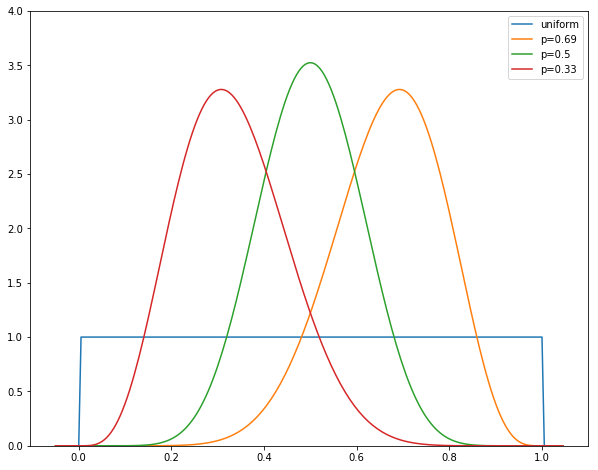

In [33]:
plt.figure(figsize=(10,8))

# We will see why we need to a use a beta later
x_axis = np.arange(-.05, 1.05, 0.005)

b_dist_1 = stats.beta(1,1)
plt.plot(x_axis, b_dist_1.pdf(x_axis), label="uniform")

b_dist_2 = stats.beta(10,5)
plt.plot(x_axis, b_dist_2.pdf(x_axis), label="p=0.69")

b_dist_3 = stats.beta(10,10)
plt.plot(x_axis, b_dist_3.pdf(x_axis), label="p=0.5")

b_dist_4 = stats.beta(5,10)
plt.plot(x_axis, b_dist_4.pdf(x_axis), label="p=0.33")



# pyplot.ylim(ymax=1.5) # adjust the max leaving min unchanged
plt.ylim(ymin=0) 

plt.ylim(ymax=4) 

# pyplot.axvline(x=.5, linewidth=1, color = 'r', )

_ = plt.legend()


The spread of the distribution is also defined by the params $\alpha$ and $\beta$, such that:
Given $X\sim B(\alpha,\beta)$

$$
var[X] = \frac{\alpha\beta}{(\alpha + \beta)^2 (\alpha+\beta+1)}
$$


Note that when $\alpha$ is much larger than $\beta$ (or the opposite), var. is small

In [34]:
def varX(a,b):
    return (a * b) / ((a + b)**2 + (a + b +1))

a = np.arange(1.,1000., 10)
b = np.arange(1.,1000., 10)

# Doing the cartesian product, not multiplying the numbers
myIndex = [x for x in itertools.product(a,b)] 


print(len(a), len(b))
print(len(myIndex))

myIndex[0:10]


100 100
10000


[(1.0, 1.0),
 (1.0, 11.0),
 (1.0, 21.0),
 (1.0, 31.0),
 (1.0, 41.0),
 (1.0, 51.0),
 (1.0, 61.0),
 (1.0, 71.0),
 (1.0, 81.0),
 (1.0, 91.0)]

In [35]:
varDF = pd.DataFrame({"alpha":[x[0] for x in myIndex], "beta":[x[1] for x in myIndex]}, index= myIndex)

In [36]:
varDF["varX"] = varX(varDF['alpha'], varDF['beta'])

In [37]:
varDF.head()

,alpha,beta,varX
"(1.0, 1.0)",1.0,1.0,0.142857
"(1.0, 11.0)",1.0,11.0,0.070064
"(1.0, 21.0)",1.0,21.0,0.041420
"(1.0, 31.0)",1.0,31.0,0.029328
"(1.0, 41.0)",1.0,41.0,0.022690


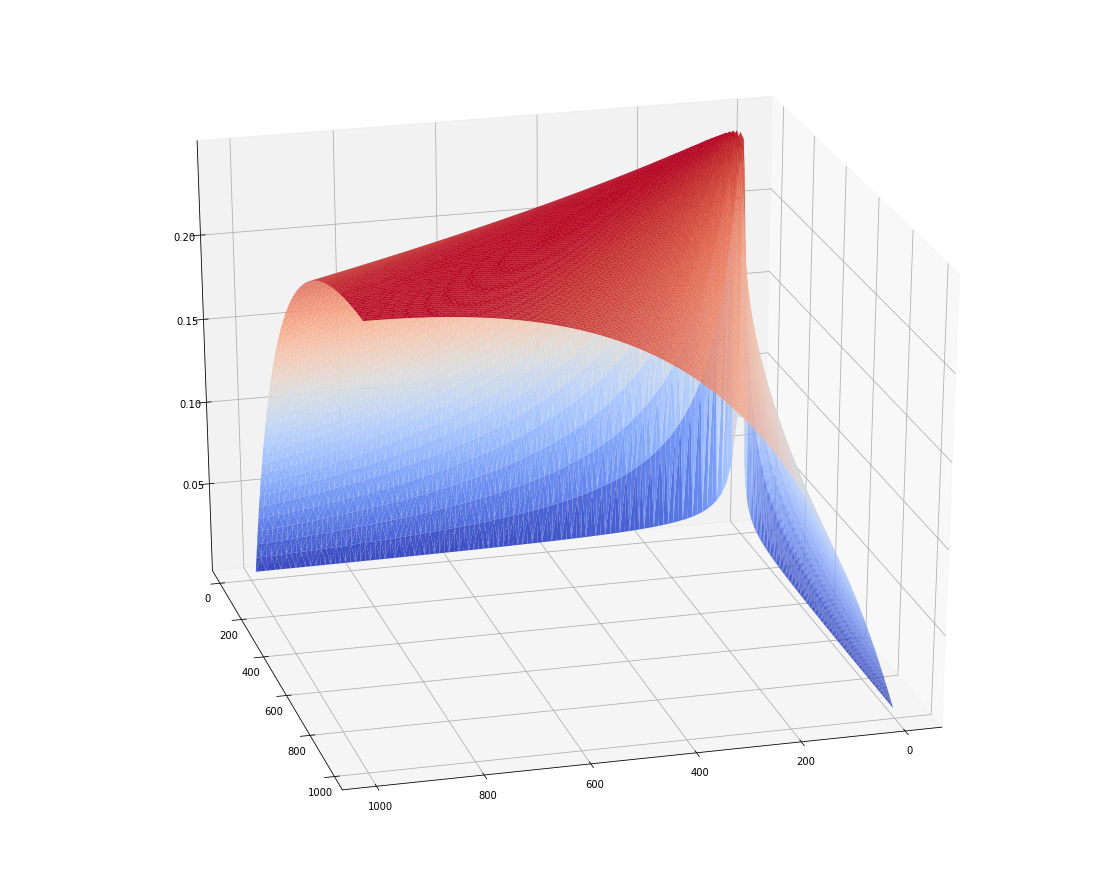

In [38]:
fig = plt.figure(figsize=(15,12))
ax = Axes3D(fig)
ax.view_init(25,75)
_ = ax.plot_trisurf(varDF['alpha'], varDF['beta'], varDF['varX'], cmap=cm.coolwarm , linewidth=0.5)

